edge detect method: Sobel
post_img.shape: (450, 600)
post_img.dtype uint8
//-------------------------------------------


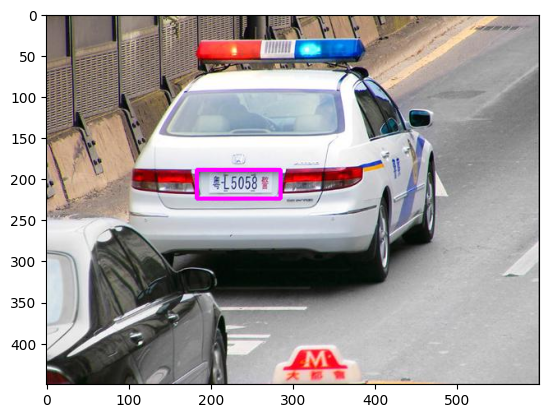

In [1]:
# paste your code below
import cv2
import ImageProcess
import numpy as np
import matplotlib.pyplot as plt

def main(img_path, ii):
    ori_img = cv2.imread(img_path) 
    plt.imshow(ori_img, cmap="gray")

    img = cv2.cvtColor(ori_img, cv2.COLOR_BGR2GRAY)
    cv2.imwrite('car0.jpg', img)

    img=ImageProcess.Image_Filter(img,'GaussianBlur',show_image=False,size=5)
    cv2.imwrite('car1.jpg', img)
    post_img=ImageProcess.Edge_Detection(img,'Sobel',gray=False,show_image=False)
    cv2.imwrite('car2.jpg', post_img)
    _, th1 = cv2.threshold(post_img,85,255,cv2.THRESH_BINARY)
    cv2.imwrite('car3.jpg', th1)

    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    closed = cv2.morphologyEx(th1, cv2.MORPH_CLOSE, kernel)
    cv2.imwrite('car5.jpg', closed)
    closed = cv2.dilate(closed, None, iterations=2)
    cv2.imwrite('car6.jpg', closed)
    closed = cv2.erode(closed, None, iterations=2)
    cv2.imwrite('car7.jpg', closed)

    (cnts, _) = cv2.findContours(closed,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    possible_img = ori_img.copy()

    for c in sorted(cnts, key=cv2.contourArea, reverse=True):
        rect = cv2.minAreaRect(c)
        Box = np.intp(cv2.boxPoints(rect))
        Box=ImageProcess.order_points_new(Box) # return  左上/右上/右下/左下 (x,y)

        if  20<Box[2][1]-Box[1][1]<80  and 60<Box[1][0]-Box[0][0]<200  and -3<Box[0][1]-Box[1][1]<10  :
            possible_img = cv2.drawContours(possible_img, [Box], -1, (255, 0, 255), 3)
            plt.imshow(possible_img[:,:,::-1], cmap="gray")
            plt.show()
            break
    # cv2.imwrite(f'output/0{ii}.jpg', possible_img)
    
if __name__ == "__main__":
    image_file = ["image/01.jpg"]
    for ii in range(len(image_file)):
        main(image_file[ii], ii)
